# How Autoencoders Work: Intro and UseCases by Shivam Bansal - Second Try

## 1. 오토인코더란?

### 1.1. 오토인코더의 정의
오토인코더(Autoencoder)는 **표현 학습(Representation Learning) 혹은 특징 학습(Feature Learning)**을 비지도 학습의 형태로 학습하는 신경망을 말한다.
* 입력의 낮은 차원에서의 특징을 추출하기 위함이다.
* 입력과 출력이 같은 신경망 구조를 갖고 있다. 왜냐하면 디코더를 통해 저차원에서 추출한 특징이 알맞는지 확인하기 때문이다.

### 1.2. 오토인코더의 구조
* `Encoder` : 노드 수가 감소하는 일련의 계층으로 구성되어 있으며, 입력을 받아 잠재 특징(Latent Feature)로 변환한다.
* `Decoder` : 노드 수가 증가하는 계층으로 Encoder와 대칭되는 구조를 띄며, 잠재 특징을 출력값으로 변환한다.
* `Latent Feature` : 낮은 차원의 잠재 특징값들. 잠재(Latent)적인 이유는 아직 디코더를 통해 확인을 받지 않았기 때문이다.

![autoencoder-architecture](../img/autoencoder-architecture.png)

### 1.3. 오토인코더의 사용 예시
* 차원 축소 (Dimentionality Reduction)
* 이미지 압축 (Image Compression)
* 이미지 노이즈 제거 (Image Denoising)
* 이미지 생성 (Image Generation)
* 특징 추출 (Feature Extraction)

### 1.4. 오토인코더의 원리
오토인코더에서 중요한 것은 **고차원 데이터를 낮은 차원의 표현으로 나타내는 것**이다. 

In [3]:
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
import numpy as np
init_notebook_mode(connected=True)

## generate random data
N = 50
random_x = np.linspace(2, 10, N)
random_y1 = np.linspace(2, 10, N)
random_y2 = np.linspace(2, 10, N)

trace1 = go.Scatter(x = random_x, y = random_y1, mode="markers", name="Actual Data")
trace2 = go.Scatter(x = random_x, y = random_y2, mode="lines", name="Model")
layout = go.Layout(title="2D Data Representation Space", xaxis=dict(title="x2", range=(0,12)), 
                   yaxis=dict(title="x1", range=(0,12)), height=400, 
                   annotations=[dict(x=5, y=5, xref='x', yref='y', text='This 1D line is the Data Manifold (where data resides)',
                   showarrow=True, align='center', arrowhead=2, arrowsize=1, arrowwidth=2, arrowcolor='#636363',
                   ax=-120, ay=-30, bordercolor='#c7c7c7', borderwidth=2, borderpad=4, bgcolor='orange', opacity=0.8)])
figure = go.Figure(data = [trace1], layout = layout)
iplot(figure)

이를 이해하기 위해 $x1$과 $x2$로 표현되는 2차원 공간에 있는 데이터를 생각해보자. 이 데이터는 **기준점 $A$와 수평선과의 각도 $L$**로 1차원으로 표현이 가능하다. 즉, 두 개의 값만 갖고 있다면 직선 위의 점 $B$는 거리 $d$로 표현이 가능하다. 더이상 $x1$과 $x2$가 아닌 거리 $d$로 표현할 수 있다!

In [4]:
random_y3 = [2 for i in range(100)]
random_y4 = random_y2 + 1
trace4 = go.Scatter(x = random_x[4:24], y = random_y4[4:300], mode="lines")
trace3 = go.Scatter(x = random_x, y = random_y3, mode="lines")
trace1 = go.Scatter(x = random_x, y = random_y1, mode="markers")
trace2 = go.Scatter(x = random_x, y = random_y2, mode="lines")
layout = go.Layout(xaxis=dict(title="x1", range=(0,12)), yaxis=dict(title="x2", range=(0,12)), height=400,
                   annotations=[dict(x=2, y=2, xref='x', yref='y', text='A', showarrow=True, align='center', arrowhead=2, arrowsize=1, arrowwidth=2, 
                                     arrowcolor='#636363', ax=20, ay=-30, bordercolor='#c7c7c7', borderwidth=2, borderpad=4, bgcolor='orange', opacity=0.8), 
                                dict(x=6, y=6, xref='x', yref='y', text='B', showarrow=True, align='center', arrowhead=2, arrowsize=1, arrowwidth=2, arrowcolor='#636363',
                                     ax=20, ay=-30, bordercolor='#c7c7c7', borderwidth=2, borderpad=4, bgcolor='yellow', opacity=0.8), dict(
                                     x=4, y=5, xref='x', yref='y',text='d', ay=-40), 
                                dict(x=2, y=2, xref='x', yref='y', text='angle L', ax=80, ay=-10)], title="2D Data Representation Space", showlegend=False)
data = [trace1, trace2, trace3, trace4]
figure = go.Figure(data = data, layout = layout)
iplot(figure)

In [5]:
random_y3 = [2 for i in range(100)]
random_y4 = random_y2 + 1
trace4 = go.Scatter(x = random_x[4:24], y = random_y4[4:300], mode="lines")
trace3 = go.Scatter(x = random_x, y = random_y3, mode="lines")
trace1 = go.Scatter(x = random_x, y = random_y1, mode="markers")
trace2 = go.Scatter(x = random_x, y = random_y2, mode="lines")
layout = go.Layout(xaxis=dict(title="u1", range=(1.5,12)), yaxis=dict(title="u2", range=(1.5,12)), height=400,
                   annotations=[dict(x=2, y=2, xref='x', yref='y', text='A', showarrow=True, align='center', arrowhead=2, arrowsize=1, arrowwidth=2, 
                                     arrowcolor='#636363', ax=20, ay=-30, bordercolor='#c7c7c7', borderwidth=2, borderpad=4, bgcolor='orange', opacity=0.8), 
                                dict(x=6, y=6, xref='x', yref='y', text='B', showarrow=True, align='center', arrowhead=2, arrowsize=1, arrowwidth=2, arrowcolor='#636363',
                                     ax=20, ay=-30, bordercolor='#c7c7c7', borderwidth=2, borderpad=4, bgcolor='yellow', opacity=0.8), dict(
                                     x=4, y=5, xref='x', yref='y',text='d', ay=-40), 
                                dict(x=2, y=2, xref='x', yref='y', text='angle L', ax=80, ay=-10)], title="Latent Distance View Space", showlegend=False)
data = [trace1, trace2, trace3, trace4]
figure = go.Figure(data = data, layout = layout)
iplot(figure)

그럼 $B$를 $A$와 $L$로 어떻게 표현될 수 있을까? 즉, 이 3개의 변수 간의 방정식은 어떻게 될까? 굳이 고정된 방정식이 없어도 **비지도 학습**으로 방정식을 구할 수 있다. 이를 **오토인코딩 관점**에서 이해해보자. 다음은 방정식을 구하기 위한 오토인코더이다. 고차원인 $x1$, $x2$에서 $d$로 축소되고 다시 $x1$과 $x2$로 변환된다.

![autoencoder-represent](../img/autoencoder-represent.png)

#### Step 1. 잠재 공간에 데이터 표현하기
$A$와 $B$를 2차원 좌표로 표현하면 다음과 같다.

* A : $(X1_A, X2_A)$
* B : $(X1_B, X2_B)$

이제 이를 잠재 공간에서는 다음과 같이 표현할 수 있다.

* A : $(X1_A, X2_A) \rightarrow (0, 0)$ 
* B : $(X1_B, X2_B) \rightarrow (u1_B, u2_B)$

$(u1_b, u2_B)$는 기준점과의 거리로 표현할 수 있다.

* $u1_B = X1_B - X1_A$
* $u2_B = X2_B - X2_A$

#### Step 2. 거리 d와 각도 L로 데이터 표현하기
이제 $u1_B$와 $u2_B$를 거리 $d$와 각도 $L$로 표현할 수 있다. 각도 $L$만큼 반대로 회전한다면 각도는 0이 될 것이다.

$$(d, L) \rightarrow (d, 0)$$

이제 데이터가 낮은 차원으로 표현되어 있는 것을 볼 수 있다. 모든 계층의 가중치와 편향으로 나타내는 신경망을 고려하면 인코딩 과정은 다음의 방정식으로 표현할 수 있다. 이 때 $W$는 은닉층의 가중치 행렬이다.

$$(d, 0) = W \dot (u1_B, u2_B)$$

인코딩 후의 **디코딩 과정**은 인코딩 과정을 정반대로 생각하면 된다.

$$(u1_B,, u2_B) = Inverse(W) \dot (d, 0)$$

### 1.5. 데이터에 따른 규칙
모든 유형의 데이터에 똑같은 규칙을 적용하여 저차원의 데이터로 나타내는 것은 아니다. 다음과 같은 데이터를 보자. 이런 유형의 데이터의 문제점은 **저차원으로 투영을 함과 동시에 원본으로 복구하기 힘들다**는 것이다. 아무리 이동하고 회전을 해도 원본으로 복구할 수 없다.

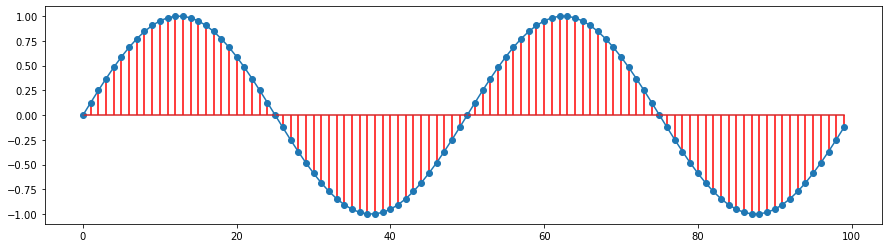

In [6]:
import matplotlib.pyplot as plt 
import numpy as np
fs = 100 # sample rate 
f = 2 # the frequency of the signal
x = np.arange(fs) # the points on the x axis for plotting
y = [ np.sin(2*np.pi*f * (i/fs)) for i in x]

%matplotlib inline
plt.figure(figsize=(15,4))
plt.stem(x,y, 'r', );
plt.plot(x,y);

이런 데이터의 경우 심층신경망(Deep Neural Network)로 공간을 구부려 선형 데이터를 만든다! 그렇기 때문에 오토인코더는 **은닉층(Hidden Layer)의 장점을 살려 저차원의 표현을 학습**할 수 있다.

![fold-space](../img/fold-space.png)

## 2. 구현하기
### 2.1. 사용 예시 1: 이미지 재구성
#### Imports

In [7]:
from tensorflow.keras.layers import Dense, Input, Conv2D, LSTM, MaxPool2D, UpSampling2D
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from numpy import argmax, array_equal
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from imgaug import augmenters
from random import randint
import pandas as pd
import numpy as np

#### Prepare dataset

In [8]:
# 데이터 로드
train = pd.read_csv('../data/fashion-mnist_train.csv')

# 입력과 라벨 데이터로 분리
train_x = train[list(train.columns)[1:]].values
train_y = train['label'].values

In [11]:
# 입력 데이터 0-1로 정규화
train_x = train_x / 255

# 학습/검증 데이터셋으로 분리
train_x, val_x, train_y, val_y = train_test_split(train_x, train_y, test_size=0.2)

# 1차원 데이터로 평탄화
train_x = train_x.reshape(-1, 784)
val_x = val_x.reshape(-1, 784)

In [12]:
print('train_x의 크기 :', train_x.shape)
print('val_x의 크기 :', val_x.shape)

train_x의 크기 : (48000, 784)
val_x의 크기 : (12000, 784)


#### Autoencoder Modeling

In [15]:
############## 모델 정의 ##############
# 입력층
input_layer = Input(shape=(784, ))

# 인코더
encode_layer1 = Dense(1500, activation='relu')(input_layer)
encode_layer2 = Dense(1000, activation='relu')(encode_layer1)
encode_layer3 = Dense(500, activation='relu')(encode_layer2)

# 잠재 특징
latent_view = Dense(10, activation='sigmoid')(encode_layer3)

# 디코더
decode_layer1 = Dense(500, activation='relu')(latent_view)
decode_layer2 = Dense(1000, activation='relu')(decode_layer1)
decode_layer3 = Dense(1500, activation='relu')(decode_layer2)

# 출력층
output_layer = Dense(784)(decode_layer3)
########################################

model = Model(input_layer, output_layer)

In [16]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 1500)              1177500   
_________________________________________________________________
dense_17 (Dense)             (None, 1000)              1501000   
_________________________________________________________________
dense_18 (Dense)             (None, 500)               500500    
_________________________________________________________________
dense_19 (Dense)             (None, 10)                5010      
_________________________________________________________________
dense_20 (Dense)             (None, 500)               5500      
_________________________________________________________________
dense_21 (Dense)             (None, 1000)              501000    
__________

#### Compile and train the model
* `최적화 알고리즘` : Adam
* `비용 함수` : MSE
* `조기 종료 학습` : 10번까지 확인

In [18]:
# 모델 컴파일 및 학습
model.compile(optimizer='adam', loss='mse')
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='auto')
model.fit(train_x, train_x, epochs=20, batch_size=2048, validation_data=(val_x, val_x), callbacks=[early_stopping])

Train on 48000 samples, validate on 12000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/20
48000/48000 [==============================] - 32s 656us/sample - loss: 0.0962 - val_loss: 0.0701
Epoch 2/20
48000/48000 [==============================] - 33s 679us/sample - loss: 0.0623 - val_loss: 0.0532
Epoch 3/20
48000/48000 [==============================] - 33s 692us/sample - loss: 0.0468 - val_loss: 0.0424
Epoch 4/20
48000/48000 [==============================] - 35s 725us/sample - loss: 0.0399 - val_loss: 0.0383
Epoch 5/20
48000/48000 [==============================] - 35s 729us/sample - loss: 0.0367 - val_loss: 0.0358
Epoch 6/20
48000/48000 [==============================] - 34s 700us/sample - loss: 0.0341 - val_loss: 0.0321
Epoch 7/20
48000/48000 [==============================] - 35s 731us/sample - loss: 0.0324 - val_loss: 0.0315
Epoch 8/20
48000/48000 [==============================] - 43s 903us/sample - loss: 0.0291 - val_loss: 0.0276
Epoch 9/20
48000/48000 [======

#### Predict

In [19]:
preds = model.predict(val_x)

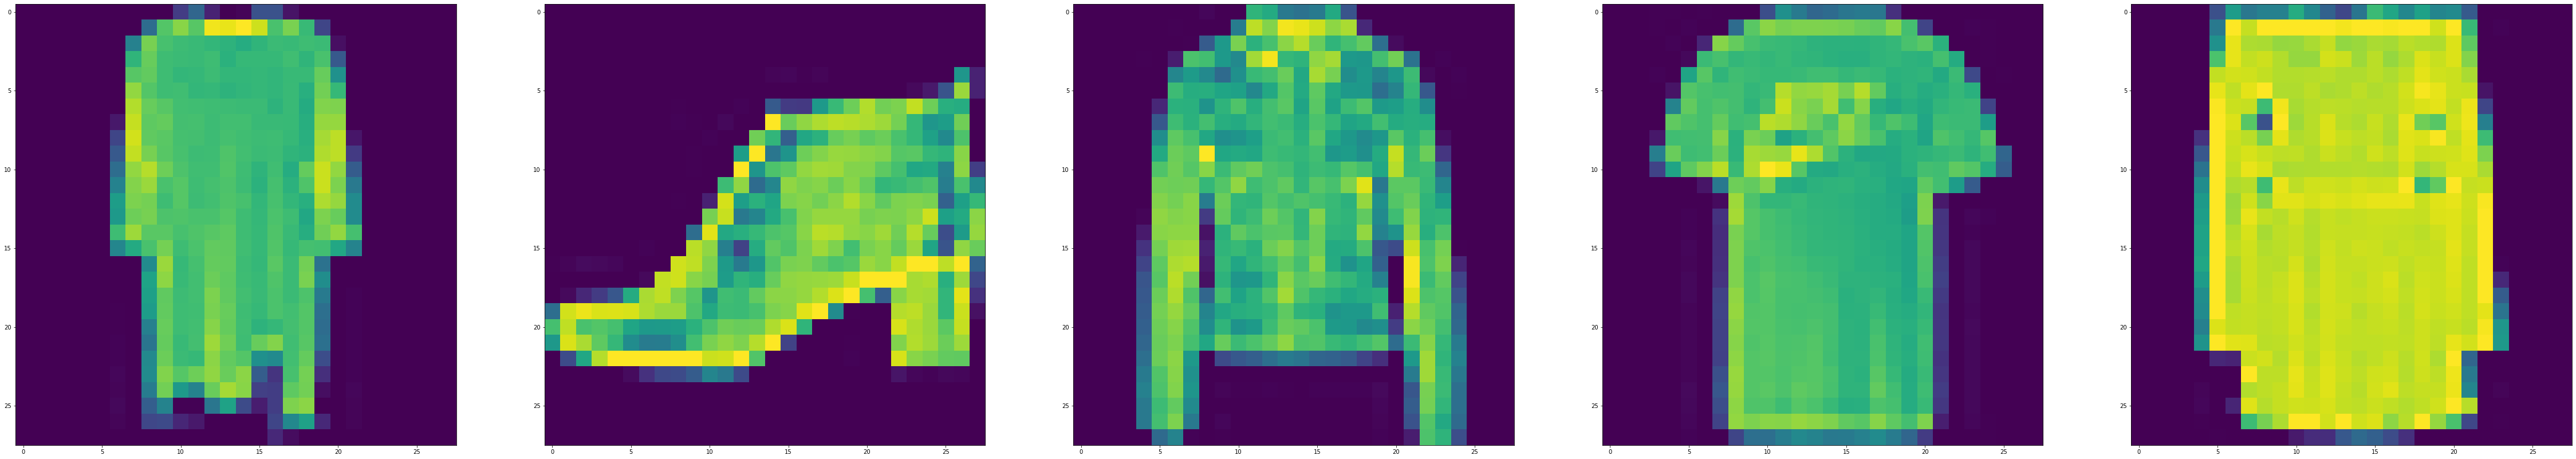

In [20]:
# 원본 이미지
from PIL import Image

f, ax = plt.subplots(1, 5)
f.set_size_inches(80, 40)
for i in range(5):
    ax[i].imshow(val_x[i].reshape(28, 28))
plt.show()

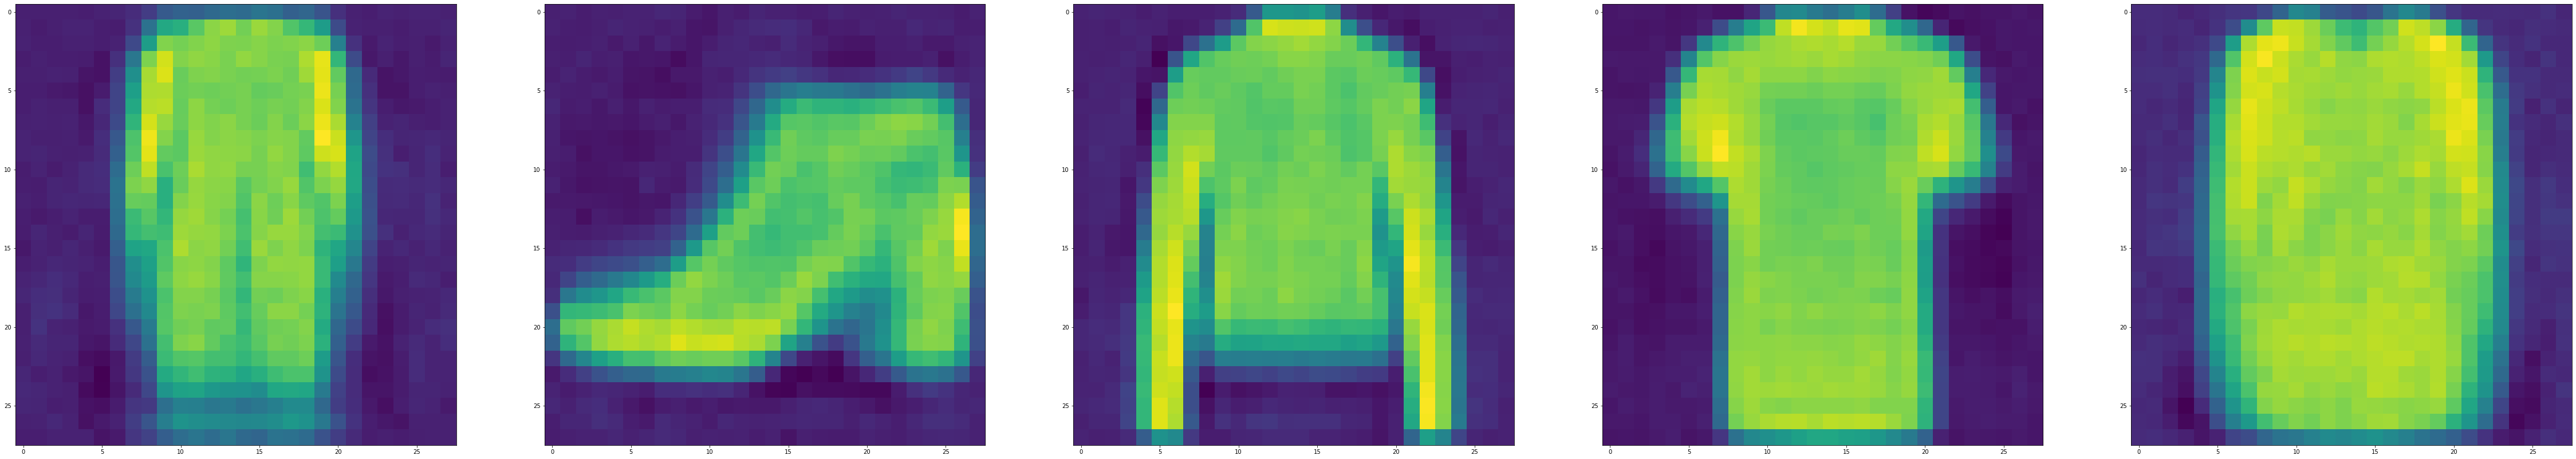

In [21]:
# 오토인코더로 예측한 이미지
f, ax = plt.subplots(1, 5)
f.set_size_inches(80, 40)
for i in range(5):
    ax[i].imshow(preds[i].reshape(28, 28))
plt.show()

### 2.2. 사용 예시 2: 이미지 노이즈 제거
이번 오토인코더는 **합성곱계층(Convolutional Layer)**를 사용한다. 왜냐하면 합성곱 신경망은 이미지 입력에 대해 매우 잘 작동하기 때문이다. 그러므로 합성곱 신경망의 입력으로 넣기 위해 $28*28$ 행렬로 변환해줘야 한다.

#### Prepare dataset

In [22]:
# 입력 데이터 추출 및 입력/검증 데이터셋 생성
train_x = train[list(train.columns)[1:]].values
train_x, val_x = train_test_split(train_x, test_size=0.2)

# 정규화
train_x = train_x/255
val_x = val_x/255

In [23]:
# 28*28 행렬로 변환
train_x = train_x.reshape(-1, 28, 28, 1)
val_x = val_x.reshape(-1, 28, 28, 1)

print('train_x의 크기 :', train_x.shape)
print('val_x의 크기 :', val_x.shape)

train_x의 크기 : (48000, 28, 28, 1)
val_x의 크기 : (12000, 28, 28, 1)


#### Add noise
노이즈 제거를 위해 의도적으로 노이즈를 추가해준다. `imgaug` 패키지는 이미지에 노이즈를 생성해주는 유용한 도구를 제공한다. 생성할 수 있는 노이즈의 종류는 다음과 같다:
* Salt and Pepper Noise
* Gaussian Noise
* Periodic Noise
* Speckle Noise

그 중 극단적으로 밝거나 어두운 픽셀을 생성하는 **Salt and Pepper Noise**를 추가해줄 것이다.

In [24]:
# Salt and Pepper Noise 추가
noise = augmenters.SaltAndPepper(0.1)
seq_object = augmenters.Sequential([noise])

train_x_n = seq_object.augment_images(train_x*255)/255
val_x_n = seq_object.augment_images(val_x*255)/255

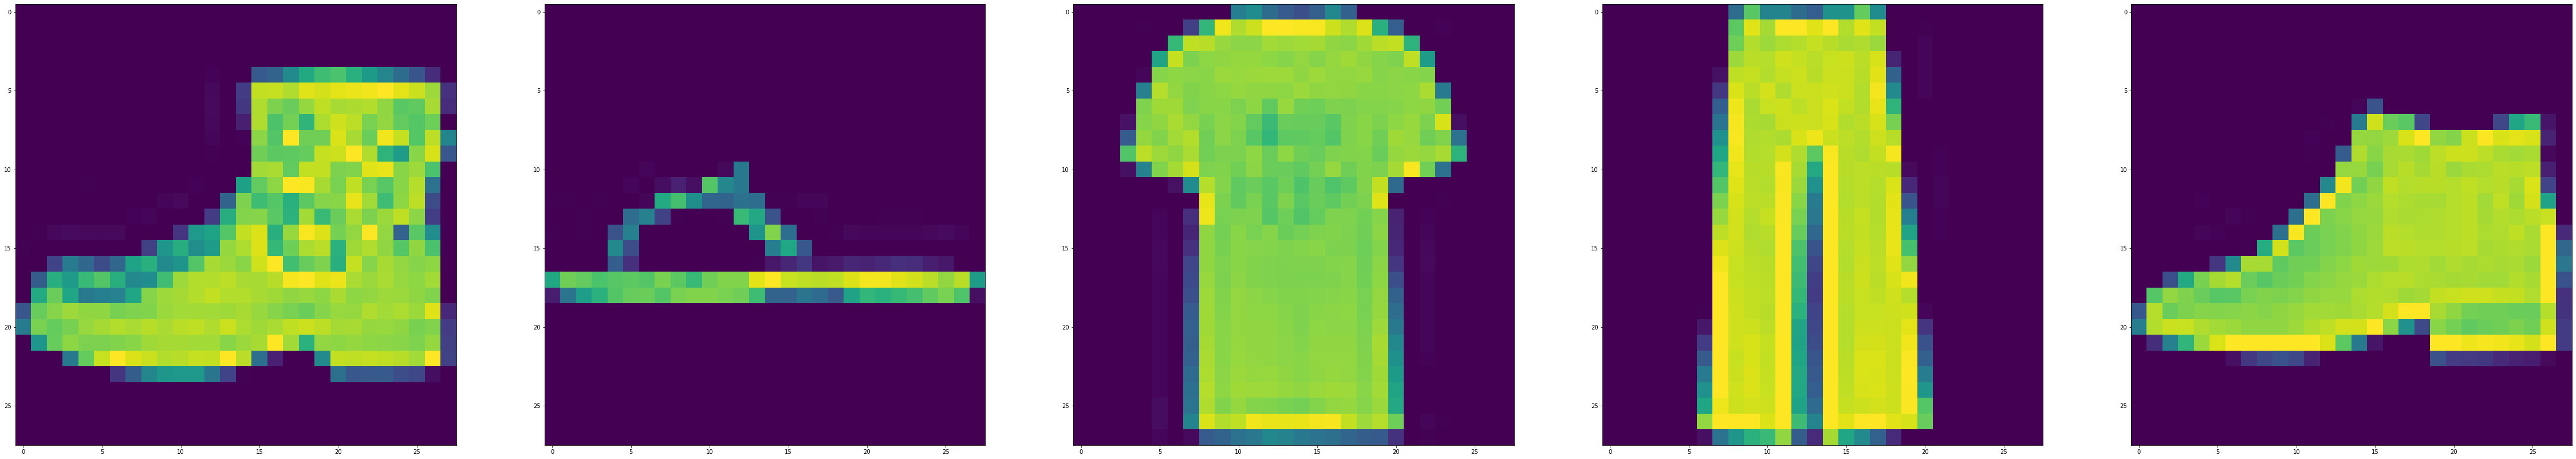

In [25]:
# 노이즈 추가하기 전
f, ax = plt.subplots(1,5)
f.set_size_inches(80, 40)
for i in range(5,10):
    ax[i-5].imshow(train_x[i].reshape(28, 28))
plt.show()

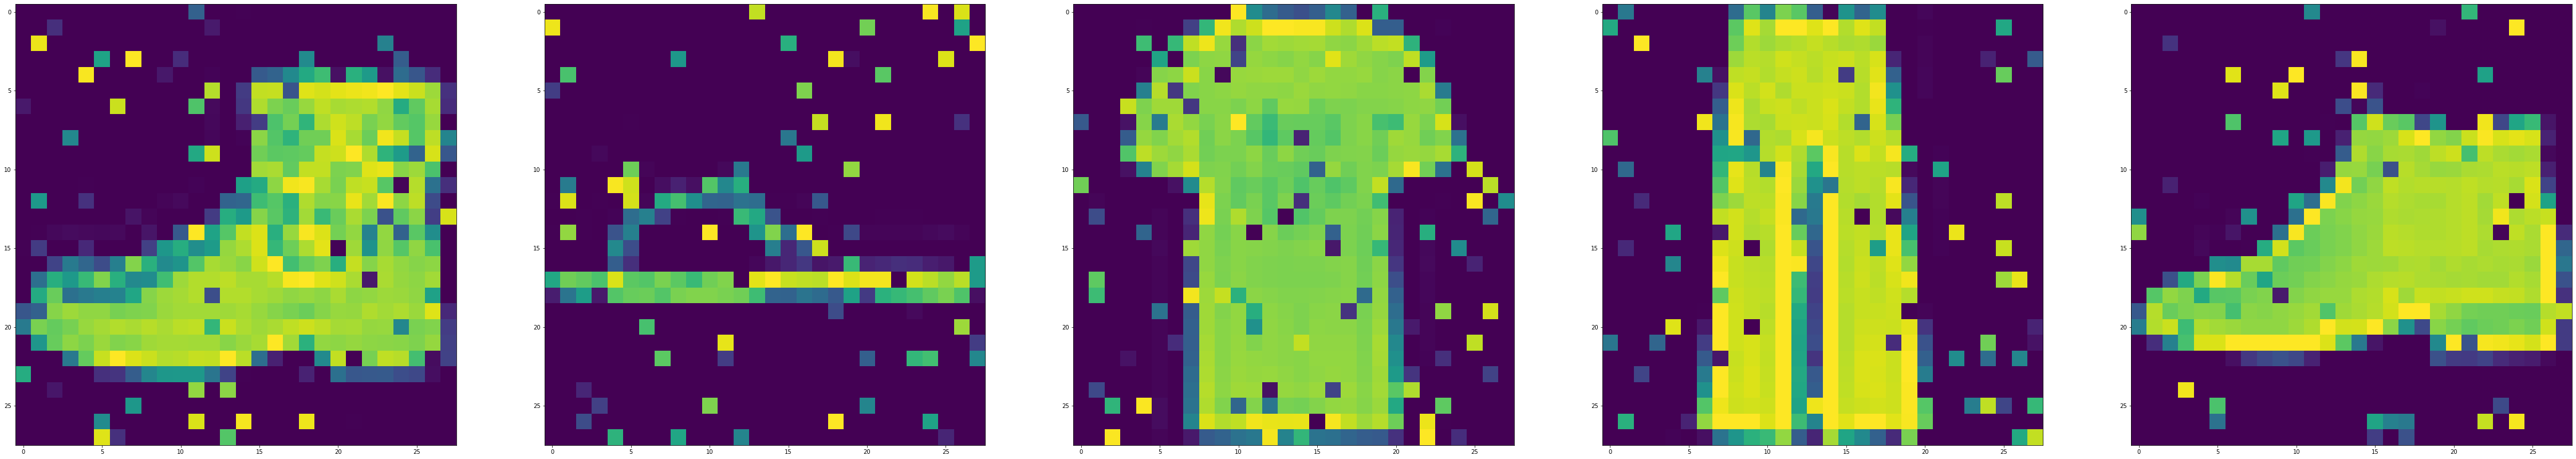

In [26]:
# 노이즈 추가한 후 
f, ax = plt.subplots(1,5)
f.set_size_inches(80, 40)
for i in range(5,10):
    ax[i-5].imshow(train_x_n[i].reshape(28, 28))
plt.show()

#### Autoencoder Modeling
* **Encoder** :  3개의 Convolution Layer와 3개의 Max Pooling Layer로 구성
    * 활성화 함수로는 relu를 사용하고 `padding=same`으로 설정하여 이미지의 크기를 유지한다.
    * Max Pooling Layer는 이미지의 차원을 다운샘플링(Down Sampling)하기 위해 사용된다.
* **Decoder** : 3개의 Convolution Layer와 3개의 UpSamplling Layer로 구성
    * 활성화 함수와 `padding` 설정은 인코더와 동일
    * UpSampling Layer는 입력 데이터를 더 높은 차원으로 업샘플링(Up Sampling)하기 위해 사용된다.

In [27]:
############## 모델 정의 ##############
# 입력층
input_layer = Input(shape=(28, 28, 1))

# 인코더
encoded_layer1 = Conv2D(64, (3, 3), activation='relu', padding='same')(input_layer)
encoded_layer1 = MaxPool2D((2, 2), padding='same')(encoded_layer1)
encoded_layer2 = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded_layer1)
encoded_layer2 = MaxPool2D((2, 2), padding='same')(encoded_layer2)
encoded_layer3 = Conv2D(16, (3, 3), activation='relu', padding='same')(encoded_layer2)

# 잠재 특징
latent_view = MaxPool2D((2, 2), padding='same')(encoded_layer3)

# 디코더
decoded_layer1 = Conv2D(16, (3, 3), activation='relu', padding='same')(latent_view)
decoded_layer1 = UpSampling2D((2, 2))(decoded_layer1)
decoded_layer2 = Conv2D(32, (3, 3), activation='relu', padding='same')(decoded_layer1)
decoded_layer2 = UpSampling2D((2, 2))(decoded_layer2)
decoded_layer3 = Conv2D(64, (3, 3), activation='relu')(decoded_layer2)
decoded_layer3 = UpSampling2D((2, 2))(decoded_layer3)

# 출력층
output_layer = Conv2D(1, (3, 3), padding='same')(decoded_layer3)
########################################

# 모델 컴파일
model_2 = Model(input_layer, output_layer)
model_2.compile(optimizer='adam', loss='mse')

In [28]:
model_2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 16)          4624      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 16)          0         
__________

In [29]:
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=5, mode='auto')
history = model_2.fit(train_x_n, train_x, epochs=20, batch_size=2048, validation_data=(val_x_n, val_x), callbacks=[early_stopping])

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
 6144/48000 [==>...........................] - ETA: 6:46 - loss: 0.1338

KeyboardInterrupt: 

#### Predict

In [ ]:
# 노이즈가 낀 검증 데이터
f, ax = plt.subplots(1,5)
f.set_size_inches(80, 40)
for i in range(5,10):
    ax[i-5].imshow(val_x_n[i].reshape(28, 28))
plt.show()

In [ ]:
# 오토인코딩 후 검증 데이터
preds = model_2.predict(val_x_n[:10])
f, ax = plt.subplots(1,5)
f.set_size_inches(80, 40)
for i in range(5,10):
    ax[i-5].imshow(preds[i].reshape(28, 28))
plt.show()

### 2.3. 사용 사례 3: Seq2Seq 예측
앞의 사례와는 달리 **1차원의 시퀀스 데이터**를 사용한다. 시퀀스 데이터로는 시계열 데이터와 문자열 데이터가 있다. CNN을 사용한 이미지 데이터와는 달리 여기서는 **LSTM**을 사용한다.

> `💡 참고`
> * [Pytorch FastCampus - RNN](https://github.com/GunhoChoi/PyTorch-FastCampus/blob/master/05_RNN/RNN.pdf) 
> * [부스트코스 Pytorch - Seq2Seq](https://github.com/CoodingPenguin/boostcourse-dl-pytorch/blob/master/Part%204.%20Recurrent%20Neural%20Network/Part%204.5.%20RNN%20Seq2Seq.ipynb)

#### Generate Data
고정된 길이의 무작위 시퀀스를 포함하는 시퀀스 데이터셋를 생성한다.

* `X1` : 난수를 포함하는 입력 시퀀스
* `X2` : 시퀀스의 다른 요소를 재생산하기 위해 시드로 사용되는 패딩 시퀀스
* `y` : 대사 시퀀스 또는 실제 시퀀스

In [30]:
def dataset_preparation(n_in, n_out, n_unique, n_samples):
    X1, X2, y = [], [], []
    for _ in range(n_samples):
        # 임의의 숫자로 된 시퀀스 생성
        input_seq = [randint(1, n_unique-1) for _ in range(n_in)]
        
        # 타겟 시퀀스 생성
        target = input_seq[:n_out]
        
        # 패딩된 시드 시퀀스 생성
        target_seq = list(reversed(target))
        seed_seq = [0] + target_seq[:-1]
        
        # 카테고리형 변수로 변환
        X1.append(to_categorical([input_seq], num_classes=n_unique))
        X2.append(to_categorical([seed_seq], num_classes=n_unique))
        y.append(to_categorical([target_seq], num_classes=n_unique))
        
    # 불필요한 차원 제거
    X1 = np.squeeze(np.array(X1), axis=1)
    X2 = np.squeeze(np.array(X2), axis=1)
    y = np.squeeze(np.array(y), axis=1)
    
    return X1, X2, y

In [31]:
# 파라미터 설정
samples = 100000
features = 51
input_size = 6
output_size = 3

In [32]:
inputs, seeds, outputs = dataset_preparation(input_size, output_size, features, samples)
print('데이터 크기 :', inputs.shape, seeds.shape, outputs.shape)
print('카테고리형으로 인코딩된 첫 번째 입력 시퀀스의 형태 :')
inputs[0][0]

데이터 크기 : (100000, 6, 51) (100000, 3, 51) (100000, 3, 51)
카테고리형으로 인코딩된 첫 번째 입력 시퀀스의 형태 :


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
      dtype=float32)

#### Autoencoder Modeling

In [45]:
def define_models(n_input, n_output):
    ############ 인코더 정의 ############
    # 입력: 시퀀스
    # 출력: 인코딩 상태
    encoder_inputs = Input(shape=(None, n_input))
    encoder = LSTM(128, return_state=True)
    encoder_outputs, state_h, state_c = encoder(encoder_inputs)
    encoder_states = [state_h, state_c]
    encoder_model = Model(encoder_inputs, encoder_states)
    #####################################
    
    ############# 모델 정의 #############
    # 입력: 시드 시퀀스
    # 출력: 디코딩 상태, 디코딩 출력
    decoder_inputs = Input(shape=(None, n_output))
    decoder_lstm = LSTM(128, return_sequences=True, return_state=True)
    decoder_outputs, _, _ = decoder_lstm(decoder_inputs, initial_state=encoder_states)
    decoder_dense = Dense(n_output, activation='softmax')
    decoder_outputs = decoder_dense(decoder_outputs)
    model = Model([encoder_inputs, decoder_inputs], decoder_outputs)
    #####################################
    
    ############ 디코더 정의 ############
    # 입력: 현재 상태 + 인코딩 시퀀스
    # 출력: 디코딩 시퀀스
    decoder_state_input_h = Input(shape=(128,))
    decoder_state_input_c = Input(shape=(128,))
    decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]
    decoder_outputs, state_h, state_c = decoder_lstm(decoder_inputs, initial_state=decoder_states_inputs)
    decoder_states = [state_h, state_c]
    decoder_outputs = decoder_dense(decoder_outputs)
    decoder_model = Model([decoder_inputs] + decoder_states_inputs, [decoder_outputs] + decoder_states)
    #####################################
    
    return model, encoder_model, decoder_model

In [46]:
autoencoder, encoder_model, decoder_model = define_models(features, features)

In [47]:
encoder_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_15 (InputLayer)        (None, None, 51)          0         
_________________________________________________________________
lstm_4 (LSTM)                [(None, 128), (None, 128) 92160     
Total params: 92,160
Trainable params: 92,160
Non-trainable params: 0
_________________________________________________________________


In [48]:
decoder_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_16 (InputLayer)           (None, None, 51)     0                                            
__________________________________________________________________________________________________
input_17 (InputLayer)           (None, 128)          0                                            
__________________________________________________________________________________________________
input_18 (InputLayer)           (None, 128)          0                                            
__________________________________________________________________________________________________
lstm_5 (LSTM)                   [(None, None, 128),  92160       input_16[0][0]                   
                                                                 input_17[0][0]                   
          

In [39]:
autoencoder.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, None, 51)     0                                            
__________________________________________________________________________________________________
input_6 (InputLayer)            (None, None, 51)     0                                            
__________________________________________________________________________________________________
lstm (LSTM)                     [(None, 128), (None, 92160       input_5[0][0]                    
__________________________________________________________________________________________________
lstm_1 (LSTM)                   [(None, None, 128),  92160       input_6[0][0]                    
                                                                 lstm[0][1]                       
          

#### Predict

In [49]:
# 원-핫 인코딩된 시퀀스를 디코딩
def reverse_onehot(encoded_seq):
    return [argmax(vector) for vector in encoded_seq]

In [ ]:
# 시퀀스 예측
def predict_sequence(encoder, decoder, sequence):
    output = []
    target_seq = np.array([0.0 for _ in range(features)])
    target_seq = target_seq.reshape(1, 1, features)

    current_state = encoder.predict(sequence)
    for t in range(out_size):
        pred, h, c = decoder.predict([target_seq] + current_state)
        output.append(pred[0, 0, :])
        current_state = [h, c]
        target_seq = pred
    return np.array(output)

In [ ]:
for k in range(5):
    X1, X2, y = dataset_preparation(input_size, output_size, features, 1)
    target = predict_sequence(encoder_model, decoder_model, X1)
    print('\nInput Sequence={}, SeedSequence={}, PredictedSequence={}'.format(reverse_onehot(X1[0]), 
                                                                             reverse_onehot(y[0]), 
                                                                             reverse_onehot(target)))